In [1]:
import pandas as pd
import numpy as np
from numpy import median
import vaex as vx
import matplotlib.pyplot as plt
import seaborn as sns
import time
from multiprocessing import Process
import gc
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_colwidth", 9999)
vx.settings.display.max_columns = 200
vx.settings.display.max_rows = 100
vx.settings.max_colwidth=60000
pd.set_option('display.float_format',lambda x : '%.4f' % x)
np.set_printoptions(suppress=True) #
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

In [ ]:
'''
seaborn.pairplot(data, hue=None, hue_order=None, 
                 palette=None, vars=None, x_vars=None,
                 y_vars=None, kind='scatter', diag_kind='auto', 
                 markers=None, height=2.5, aspect=1,
                 dropna=True,plot_kws=None, diag_kws=None,
                 grid_kws=None, size=None)
kind：{"scatter","reg"}
diag_kind:{"auto","hist","kde"}
height:
{plot，diag，grid} _kws：dicts
'''

In [2]:
sns.set(style='darkgrid')
path = '../data/'
csv_name_tips = 'iris.csv'
iris = pd.read_csv(path+csv_name_tips)
print(iris.shape)
print(iris.dtypes)
print(iris.info())
print('----------------------')
print(iris.describe(include='all'))
print('-------------isnull----------------')
print(iris.isnull().sum())

(150, 5)
SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
----------------------
        SepalLength  SepalWidth  PetalLength  PetalWidth         Name
count      150.0000    150.0000     150.0000    150.0000          150
unique          NaN         NaN          NaN         NaN            3
top             NaN         NaN          NaN         NaN  Iris-setosa
freq            NaN         NaN          NaN         NaN           50
mean         5.8433      3.0540   

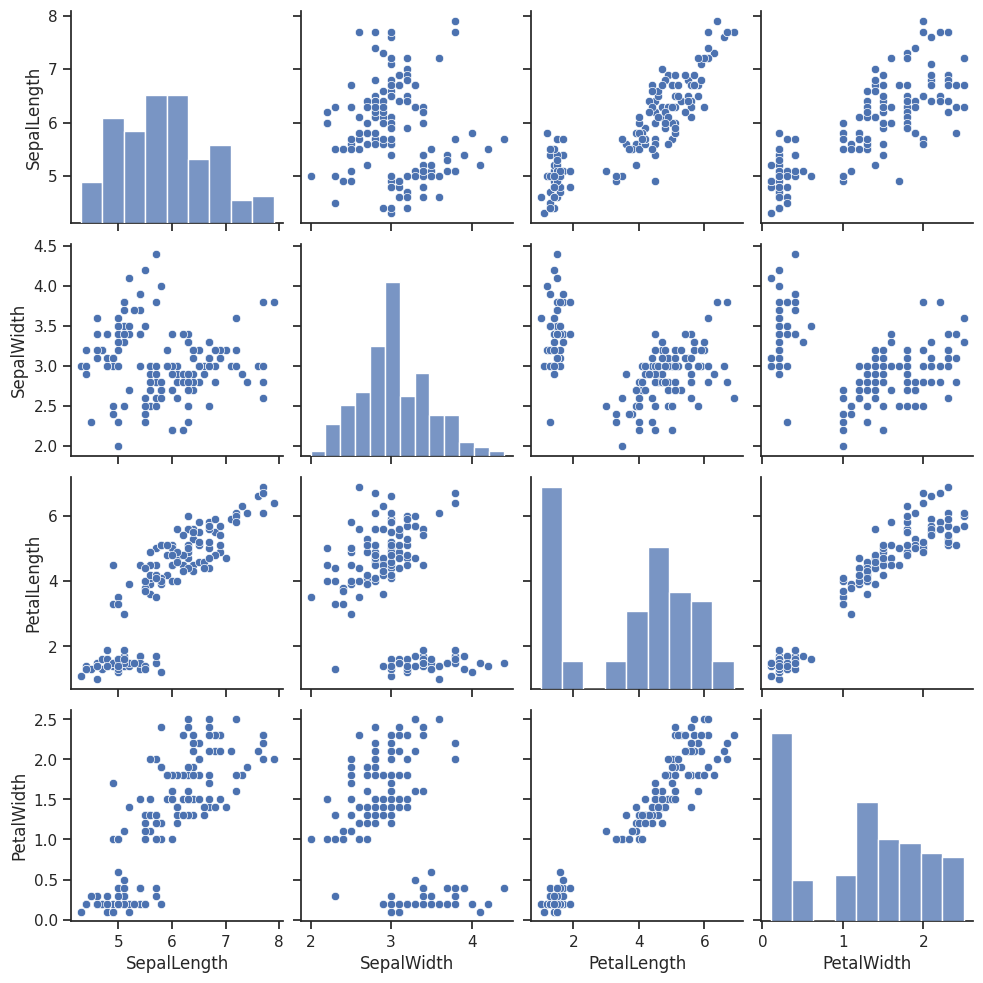

In [4]:
#1
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris)
plt.show()

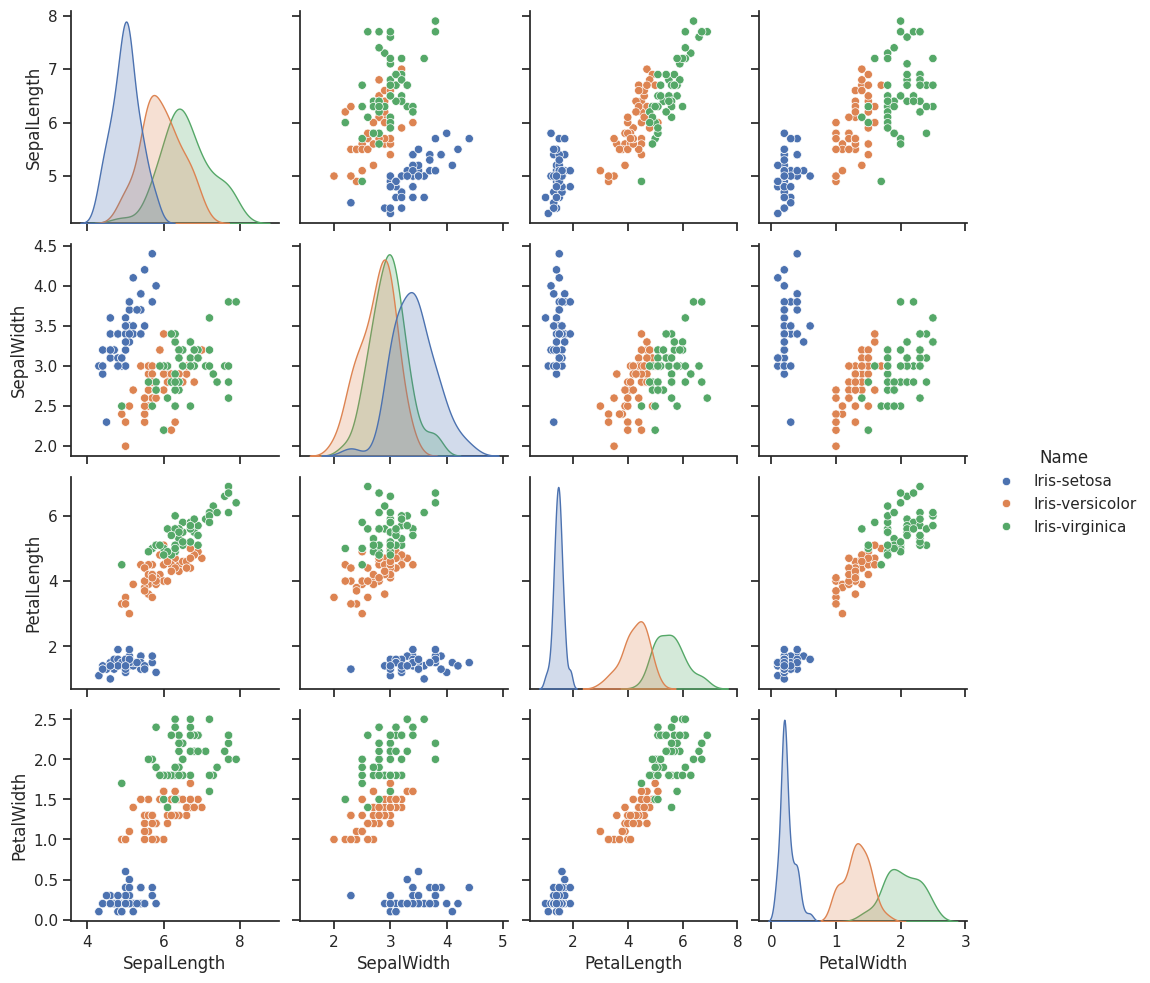

In [7]:
#2
plt.close('all')
sns.pairplot(iris,hue="Name")
plt.show()

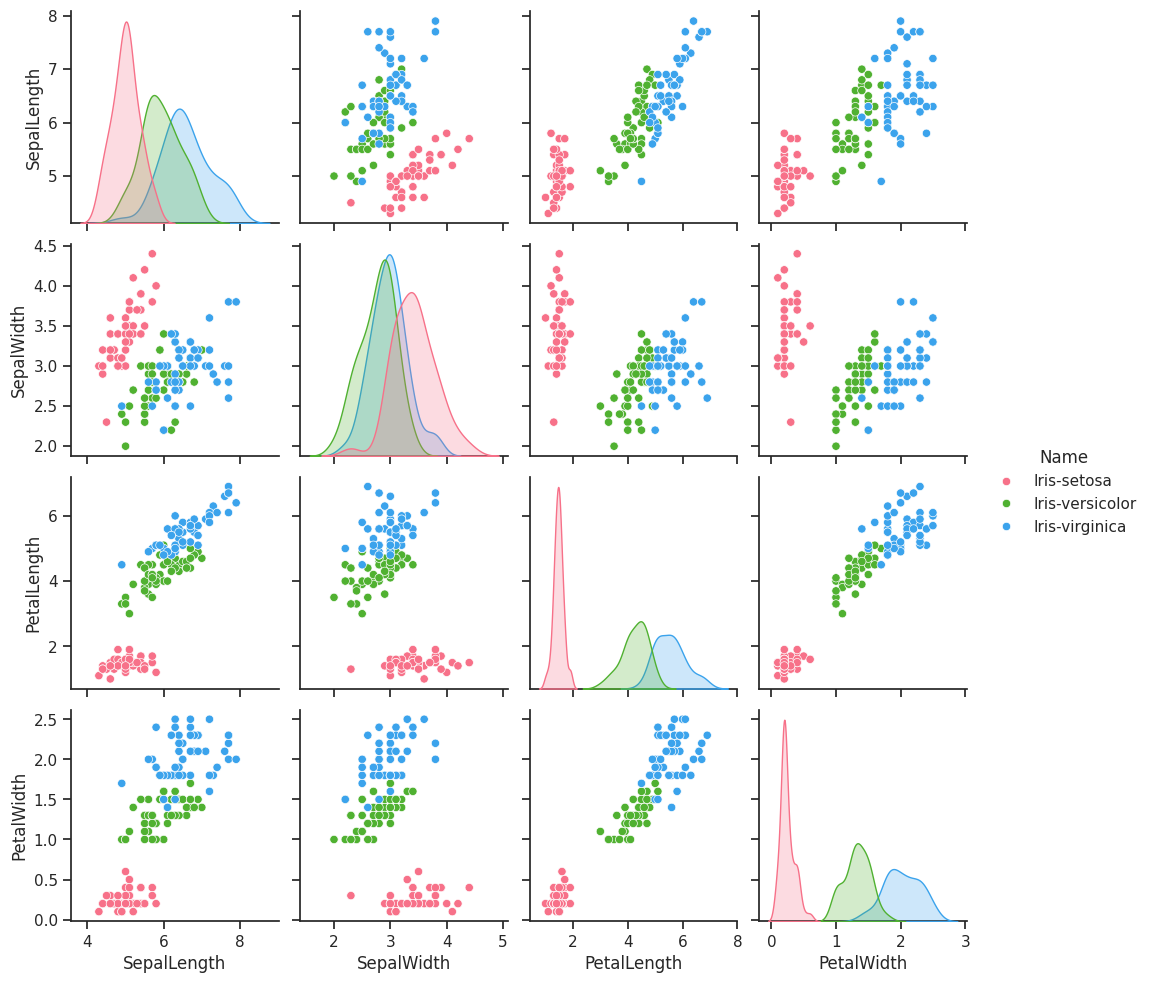

In [8]:
#3
plt.close('all')
sns.pairplot(iris,hue="Name", palette="husl")
plt.show()

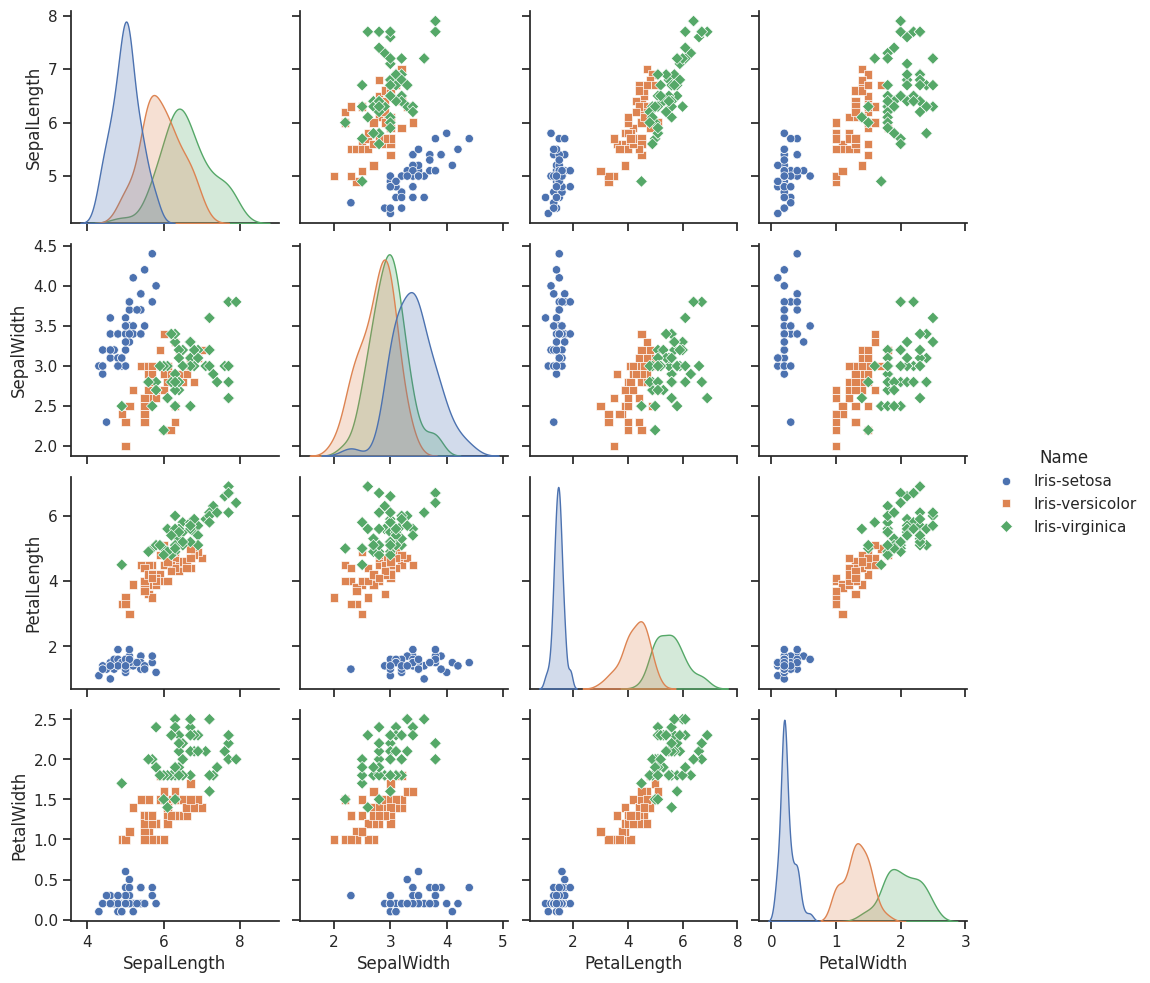

In [9]:
#4
plt.close('all')
sns.pairplot(iris,hue='Name',markers=['o','s','D'])
plt.show()

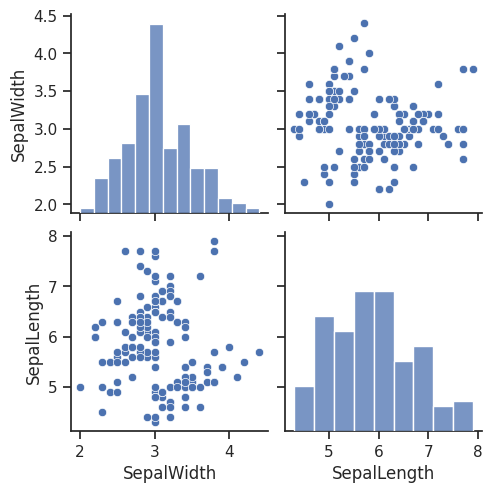

In [11]:
#5
plt.close('all')
sns.pairplot(iris,vars=["SepalWidth", "SepalLength"])
plt.show()

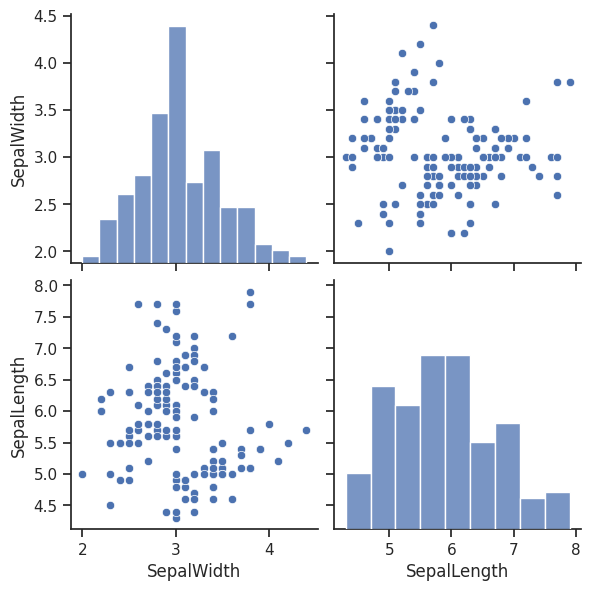

In [12]:
#6
plt.close('all')
sns.pairplot(iris, height=3,vars=["SepalWidth", "SepalLength"])
plt.show()

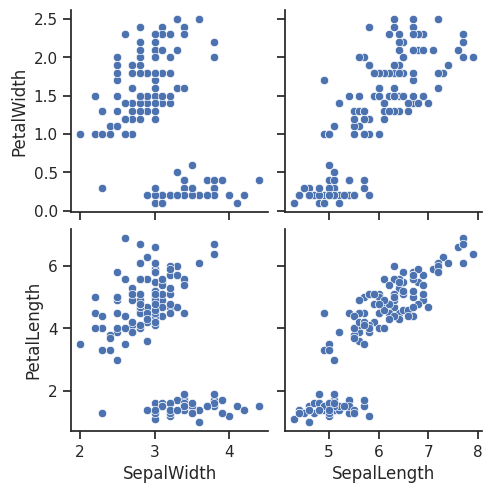

In [13]:
#7
plt.close('all')
sns.pairplot(iris,x_vars=["SepalWidth", "SepalLength"], y_vars=["PetalWidth", "PetalLength"])
plt.show()

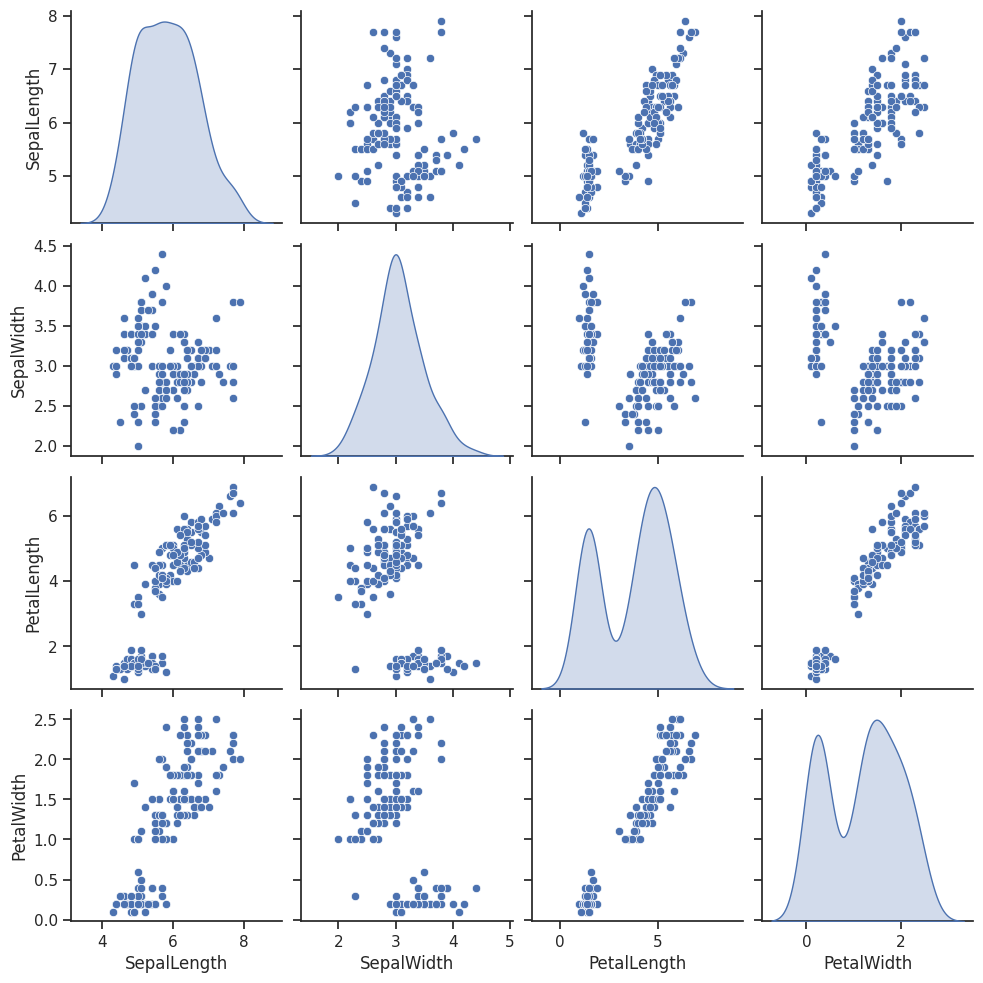

In [14]:
#8 diag_kind指定绘制图类型(kde核密度估计图)
plt.close('all')
sns.pairplot(iris,diag_kind="kde")
plt.show()

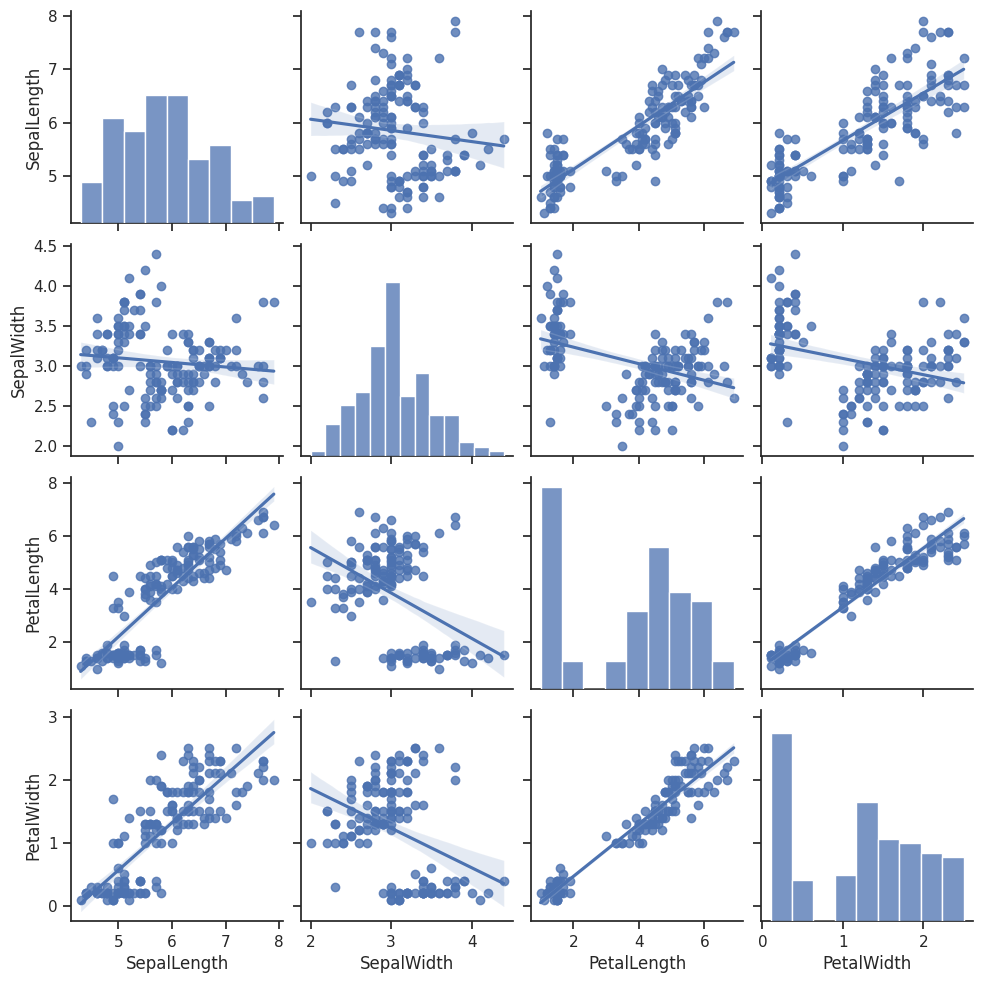

In [15]:
#9 kind=reg为散点图添加线性回归模型
plt.close('all')
sns.pairplot(iris,kind="reg")
plt.show()

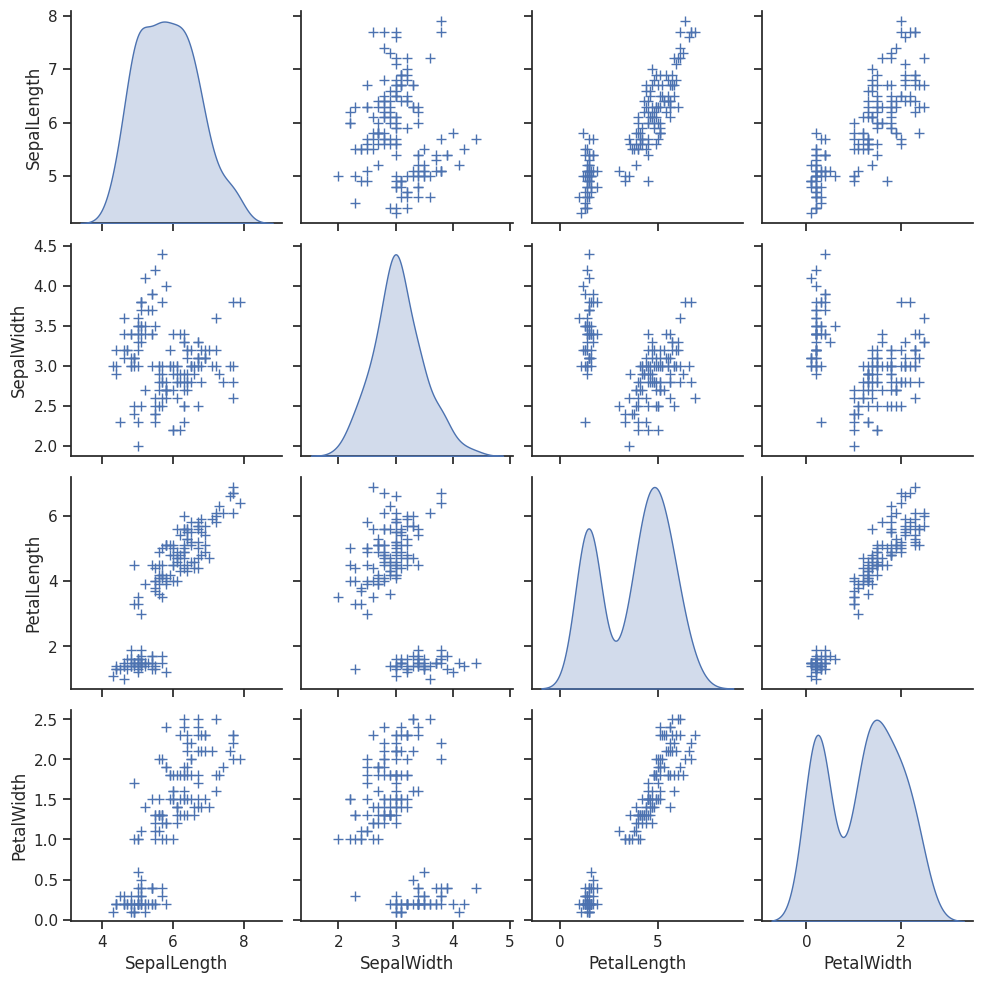

In [16]:
#10 为联合关系绘制散点图 iag_kind指定绘制图类型(kde核密度估计图)
plt.close('all')
sns.pairplot(iris,diag_kind="kde", markers="+",
             plot_kws=dict(s=50, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True))
plt.show()

In [ ]:
'''
回归模型
sns.lmplot(x, y, data, hue=None,
               col=None, row=None, palette=None,
               col_wrap=None, height=5, aspect=1,
               markers='o', sharex=True, sharey=True, 
               hue_order=None, col_order=None, row_order=None, 
               legend=True, legend_out=True, x_estimator=None,
               x_bins=None, x_ci='ci', scatter=True, fit_reg=True,
               ci=95, n_boot=1000, units=None, order=1, 
               logistic=False, lowess=False, robust=False,
               logx=False, x_partial=None, y_partial=None, 
               truncate=False, x_jitter=None, y_jitter=None, 
               scatter_kws=None, line_kws=None, size=None)
palette: list or dict 
col_wrap:int
height:
height:
aspect:
markers:
share{x,y} : bool, "col", or "row"
{hue,col,row}_order :  list
'''

In [18]:
tips = pd.read_csv(path+'tips.csv')

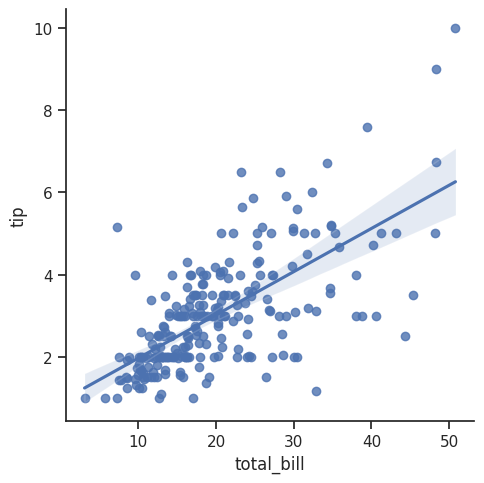

In [19]:
#1
plt.close('all')
sns.lmplot(x='total_bill',y='tip',data=tips)
plt.show()

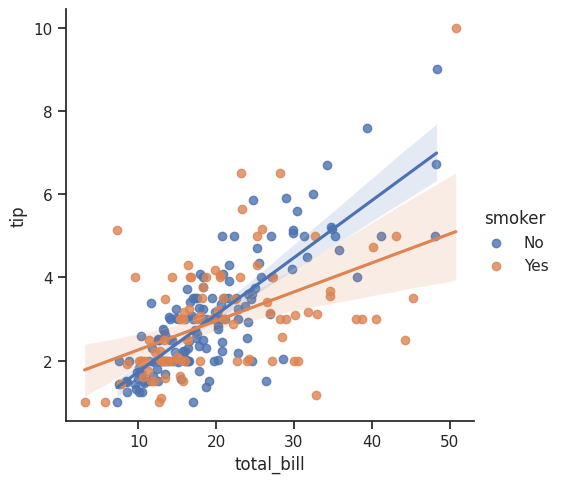

In [20]:
#2
plt.close('all')
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips)
plt.show()

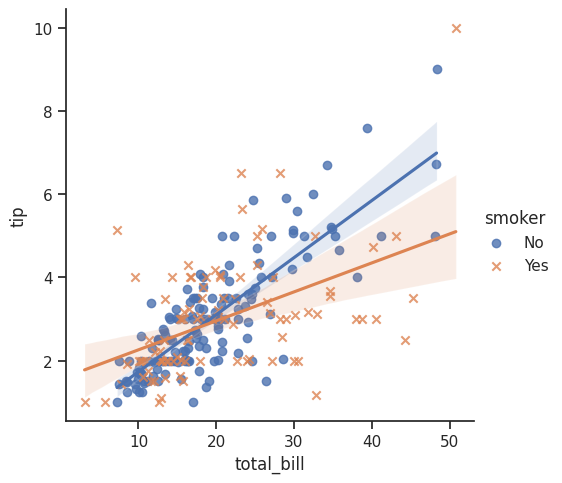

In [21]:
#3
plt.close('all')
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips,markers=['o','x'])
plt.show()

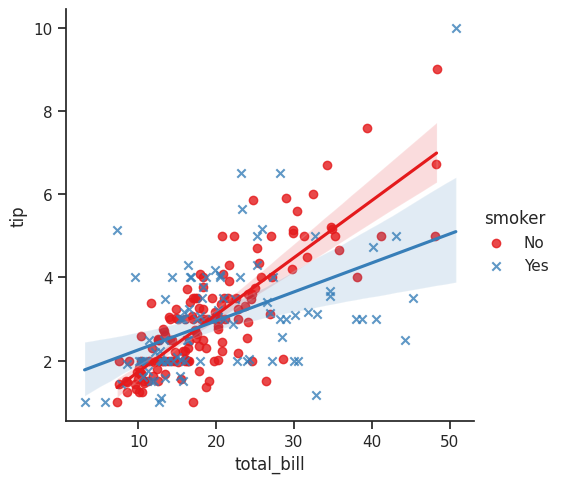

In [22]:
#4
plt.close('all')
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips,markers=['o','x'],palette='Set1')
plt.show()

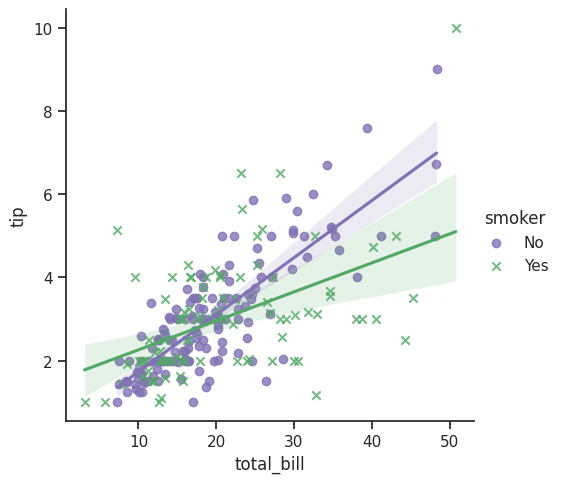

In [23]:
#5
plt.close('all')
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips,markers=['o','x'],palette=dict(Yes='g',No='m'))
plt.show()

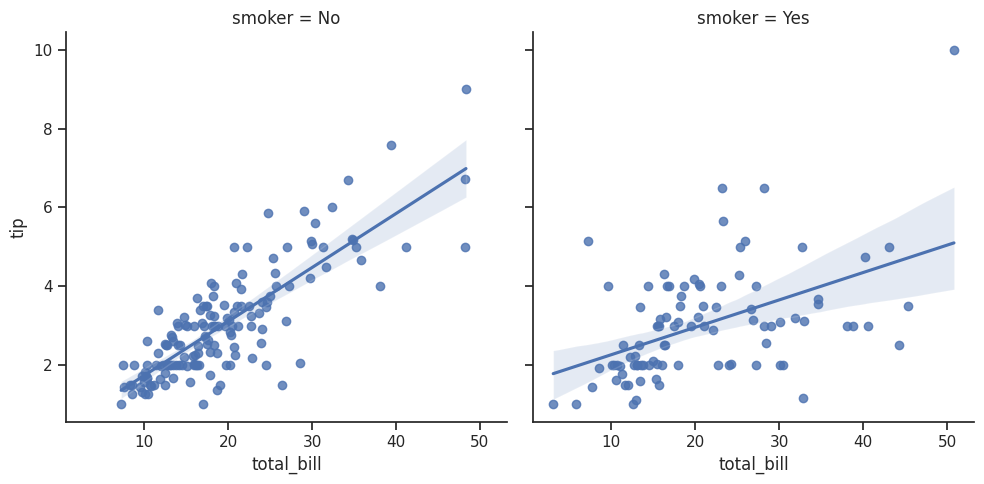

In [24]:
#6
plt.close('all')
sns.lmplot(x='total_bill',y='tip',data=tips,col='smoker')
plt.show()

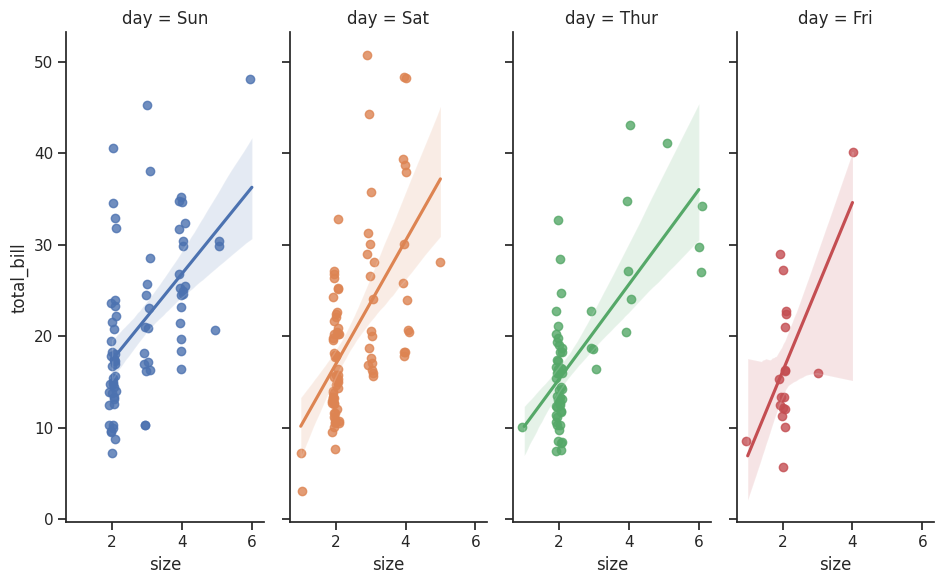

In [27]:
#7 col，将不同的分组分别绘制(列数为类别数)
plt.close('all')
sns.lmplot(x="size", y="total_bill", 
           hue="day", col="day",data=tips, height=6,aspect=.4, x_jitter=.1)
plt.show()

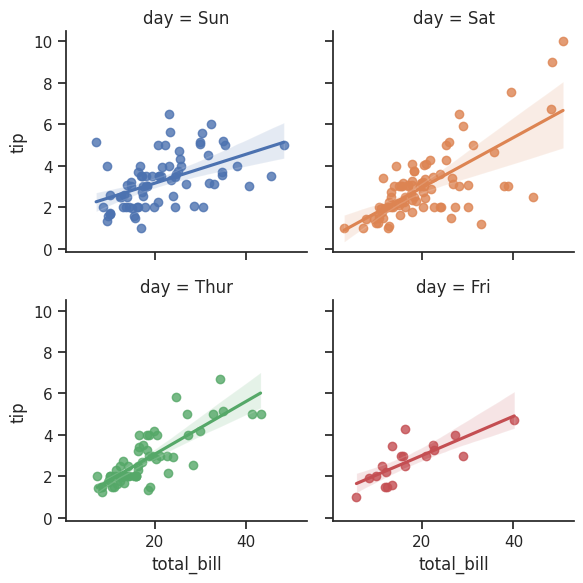

In [28]:
#8 col_wrap,将多列换成多行(多列不美观)
plt.close('all')
sns.lmplot(x="total_bill", y="tip", 
           col="day", hue="day",
           data=tips, col_wrap=2, height=3)
plt.show()

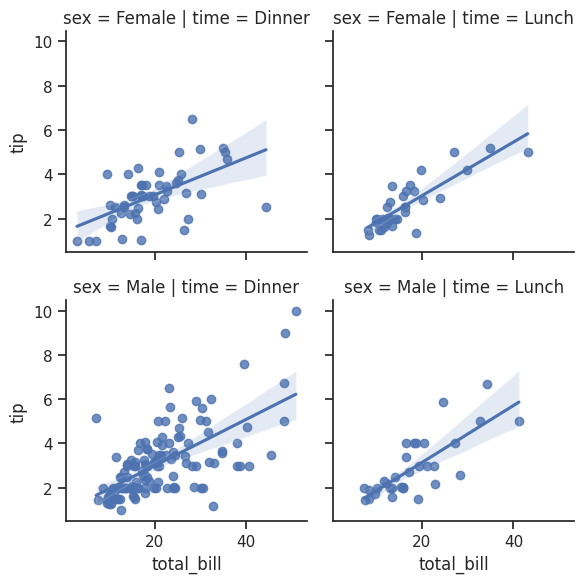

In [29]:
#9
plt.close('all')
sns.lmplot(x="total_bill", y="tip",row="sex", col="time",data=tips, height=3)
plt.show()

In [ ]:
'''
线性回归：
sns.regplot(x, y, data=None,x_estimator=None, 
                x_bins=None,x_ci='ci', scatter=True,
                fit_reg=True, ci=95, n_boot=1000,
                units=None, order=1, logistic=False,
                lowess=False, robust=False, logx=False,
                x_partial=None, y_partial=None,
                truncate=False, dropna=True,
                x_jitter=None, y_jitter=None, label=None,
                color=None, marker='o', scatter_kws=None,
                line_kws=None, ax=None)

'''

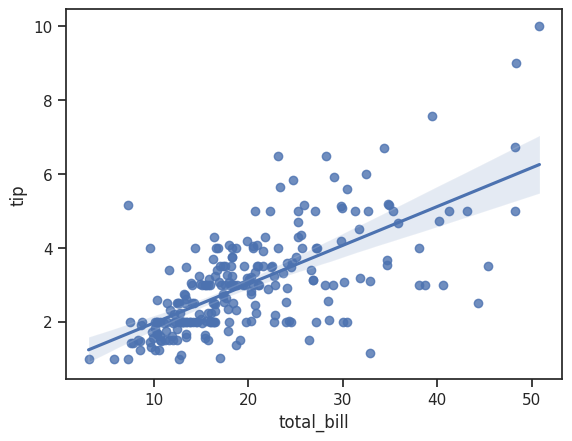

In [30]:
#1.
plt.close('all')
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

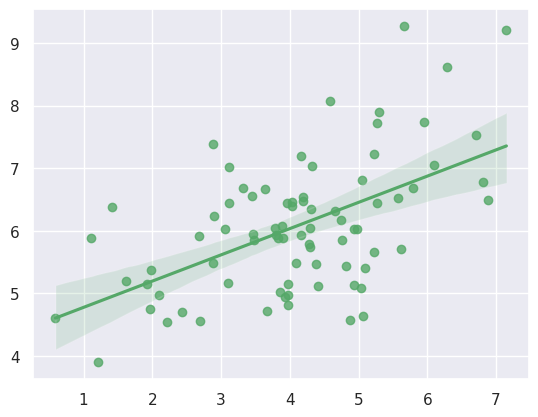

In [31]:
#2 绘制双变量的线性关系
plt.close('all')
sns.set(color_codes=True)
np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T
sns.regplot(x=x, y=y, color="g")
plt.show()

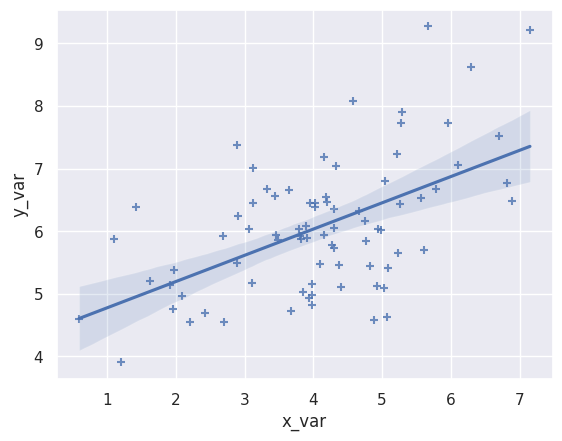

In [32]:
#3 绘制双变量的线性关系
plt.close('all')
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")
sns.regplot(x=x, y=y, marker="+")
plt.show()

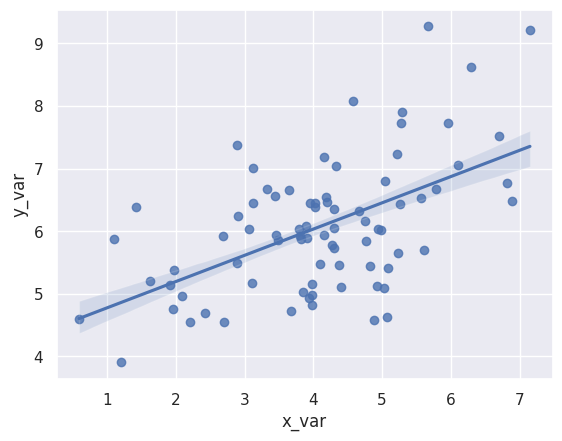

In [33]:
#4 并设置ci=68:使用68%的置信区间，该区间对应于估计的标准误差
plt.close('all')
sns.regplot(x=x, y=y, ci=68)
plt.show()

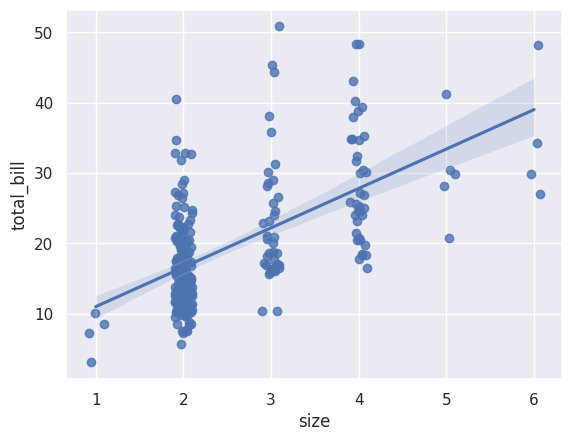

In [34]:
#5 指定按x轴进行分组 并对x轴分组数据增加一些抖动(x_jitter=.1)
plt.close('all')
sns.regplot(x="size", y="total_bill",data=tips, x_jitter=.1)
plt.show()

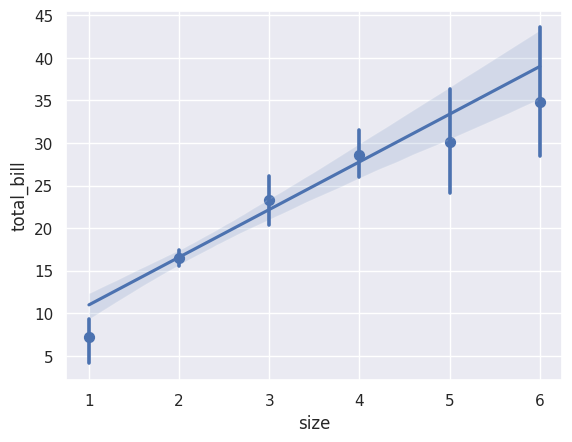

In [35]:
#6 指定按x轴进行分组，只显示每一分组数据的均值和置信区间
plt.close('all')
sns.regplot(x="size", y="total_bill",data=tips,x_estimator=np.mean)
plt.show()

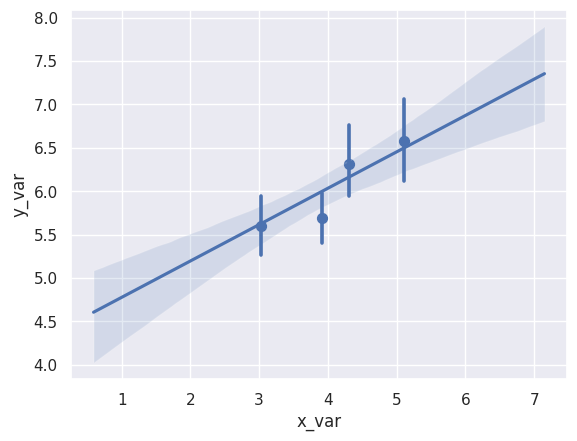

In [37]:
#7 将连续变量绘制成不连续的区域
plt.close('all')
np.random.seed(8)
mean, cov = [4, 6], [(1.5, .7), (.7, 1)]
x, y = np.random.multivariate_normal(mean, cov, 80).T
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")
sns.regplot(x=x, y=y, x_bins=4)
plt.show()

In [38]:
anscombe = pd.read_csv(path+'anscombe.csv')
print(anscombe.shape)
print(anscombe.dtypes)
print(anscombe.info())
print('----------------------')
print(anscombe.describe(include='all'))
print('-------------isnull----------------')
print(anscombe.isnull().sum())
print(anscombe.head(2))

(44, 3)
dataset     object
x          float64
y          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB
None
----------------------
       dataset       x       y
count       44 44.0000 44.0000
unique       4     NaN     NaN
top          I     NaN     NaN
freq        11     NaN     NaN
mean       NaN  9.0000  7.5007
std        NaN  3.1988  1.9589
min        NaN  4.0000  3.1000
25%        NaN  7.0000  6.1175
50%        NaN  8.0000  7.5200
75%        NaN 11.0000  8.7475
max        NaN 19.0000 12.7400
-------------isnull----------------
dataset    0
x          0
y          0
dtype: int64
  dataset       x      y
0       I 10.0000 8.0400
1       I  8.0000 6.9500


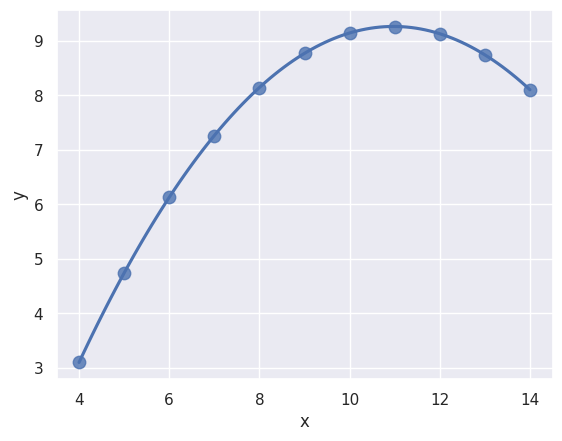

In [39]:
#8 拟合高阶多项式回归并阶段模型预测
plt.close('all')
sns.regplot(x="x", y="y",
            data=anscombe.loc[anscombe.dataset == "II"],
            scatter_kws={"s": 80}, order=2, ci=None, truncate=True)
plt.show()

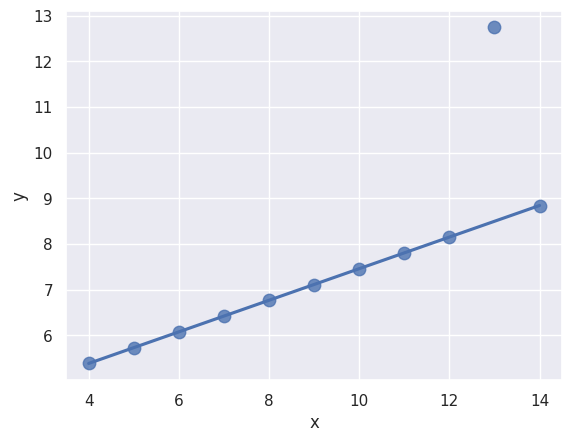

In [40]:
#9 拟合稳健回归，不要置信区间
plt.close('all')
sns.regplot(x="x", y="y", 
            data=anscombe.loc[anscombe.dataset == "III"],
            scatter_kws={"s": 80},robust=True, ci=None)
plt.show()

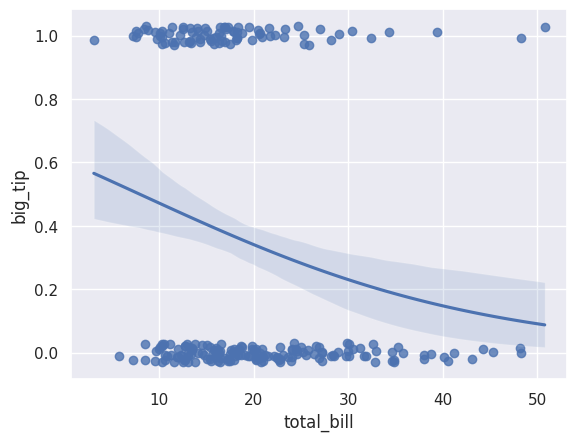

In [42]:
#10 拟合logistic 回归(logistic=True)， 对y轴数据进行抖动(y_jitter=.03) 并进行适当的迭代(n_boot=500)
plt.close('all')
tips["big_tip"] = (tips.tip / tips.total_bill) > .175
sns.regplot(x="total_bill", y="big_tip",data=tips,logistic=True,n_boot=500, y_jitter=.03)
plt.show()

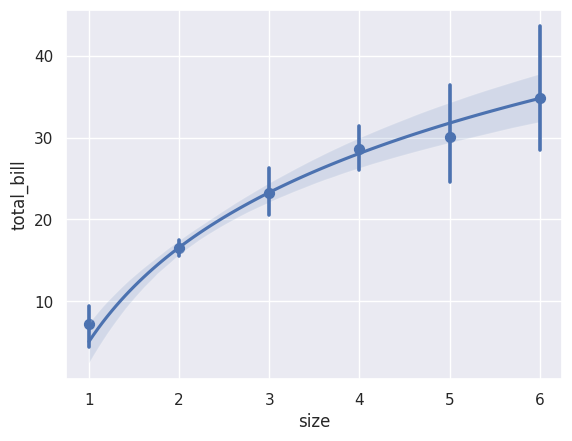

In [43]:
#11 使用log(x)拟合回归模型，并阶段模型预测
plt.close('all')
sns.regplot(x="size", y="total_bill",data=tips,x_estimator=np.mean,logx=True, truncate=True)
plt.show()